# TWEET SENTIMENT ANALYTICS 
***
# <center> Tunggal Manda Ary Triyono
# ---------------------------------------------------------------------------------------------------------------

# Import Library

In [1]:
import pandas as pd 
import numpy as np 

#import nltk for natural language toolkit
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk 
nltk.download('stopwords')

#import string, regex, , uniqcode
import re, string, unicodedata

#import sklearn preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#import sklearn for modeling
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#import sklearn for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#import visualization module 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

#import tqdm 
from tqdm import tqdm 
tqdm.pandas()

#textblob
from textblob import Word

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


# Load Dataset

In [2]:
df = pd.read_csv('clean_tweet.csv')

In [3]:
df.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


# Handle Missing Value

In [4]:
df.shape

(1600000, 2)

***
Pada data ini terdapat **1.600.000 baris** data dan **2 kolom**
***

In [5]:
df.isna().sum()

text      3247
target       0
dtype: int64

***
Dari data diatas dapat dilihat bahwa ada **3247 Missing Value**
***

In [6]:
df = df.dropna()

***
Fungsi diatas untuk menghapus missing value
***

In [7]:
df.isna().sum()

text      0
target    0
dtype: int64

In [8]:
df.shape

(1596753, 2)

***
Setelah dihilangkan missing valuenya, sisa **tweet**nya adalah **1596752**
***

# Preprocessing

### Lower Casing

In [9]:
df['text']=df['text'].str.lower()

In [10]:
df.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


***
Lower cassing digunakan untuk membuat semua huruf dalam tweet menjadi huruf kecil
***

### Punctuation removal

In [11]:
df['text'] = df['text'].str.replace('[^\w\s]','')
df.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


***
Punctuation removal digunakan untuk Menghapus tanda baca
***

### Stopwords removal

In [12]:
#stopword 
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head()

,text,target
0,awww bummer shoulda got david carr third day,0
1,upset update facebook texting might cry result...,0
2,dived many times ball managed save rest go bounds,0
3,whole body feels itchy like fire,0
4,behaving mad see,0


***
Stopword removal digunakan untuk menghilangkan keyword
***

# Visualization

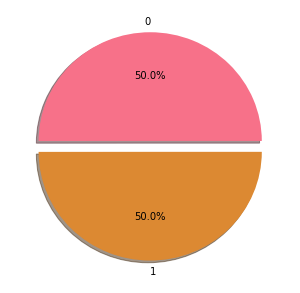

In [13]:
colors=sns.color_palette("husl", 10)
a = pd.Series(df['target'].value_counts())
plt.figure(figsize=(5,5))
plt.pie(a, labels=a.index, autopct='%1.1f%%', colors=colors, shadow=True, explode=[0.05,0.05])
plt.show()

Dapat dilihat bahwa jumlah target **0(sentiment negatif)** dan **1(sentiment positif)** pada dataset adalah **berimbang**

# Wordcloud

In [74]:
from PIL import Image
import os
from os import path

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image
mask = np.array(Image.open(path.join(d, "twitter_mask.png")))

df_all=df
words_all = ' '.join(df_all['text'])
cleaned_word_all = " ".join([word_all for word_all in words_all.split()
                            if 'http' not in word_all
                                and not word_all.startswith('@')
                                and word_all != 'RT'])

wordcloud_all = WordCloud(mask=mask, 
                          font_path='CabinSketch-Bold.ttf',
                          stopwords=STOPWORDS, 
                          background_color='white', 
                          contour_width=3, 
                          contour_color='steelblue',
                          width=6000, 
                          height=6000).generate(cleaned_word_all)

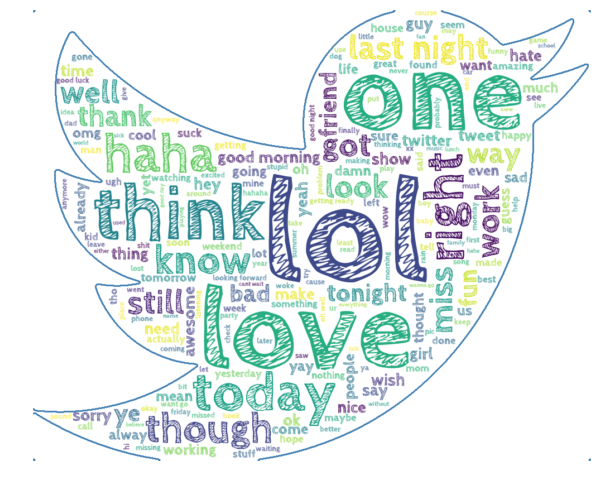

In [75]:
# store to file
#wc.to_file(path.join(d, "tweet.png"))

# show
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis("off")
plt.show()

***
Kata yang paling banyak muncul pada tweet adalah love, lol, now, one, right, now, think, haha, thought, last, night, today
***

In [76]:
def worldcloud_wSen(target):  
    df_wSen=df[df['target']==target]
    words_wSen = ' '.join(df_wSen['text'])
    cleaned_word_wSen = " ".join([word_wSen for word_wSen in words_wSen.split()
                                if 'http' not in word_wSen
                                    and not word_wSen.startswith('@')
                                    and word_wSen != 'RT'])
    wordcloud_wSen = WordCloud(mask=mask, 
                          font_path='CabinSketch-Bold.ttf',
                          stopwords=STOPWORDS, 
                          background_color='white', 
                          contour_width=3, 
                          contour_color='steelblue',
                          width=6000, 
                          height=6000).generate(cleaned_word_wSen)
    plt.imshow(wordcloud_wSen)
    plt.axis('off')
    plt.title(target)

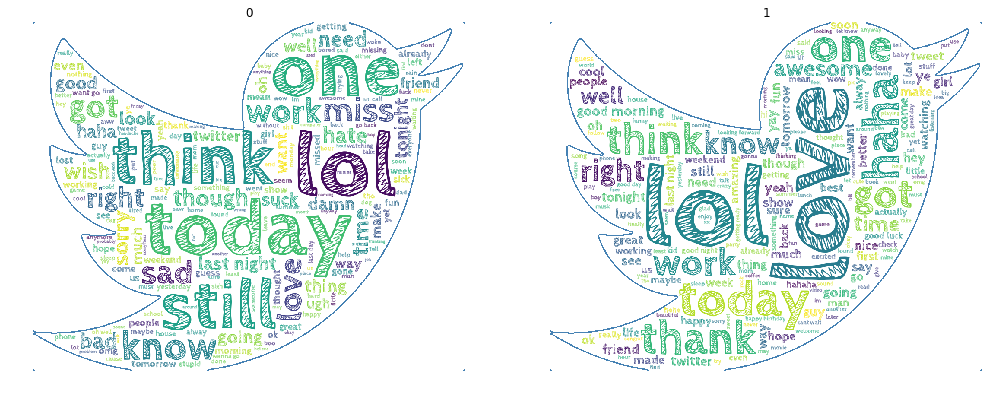

In [77]:
target= df['target'].unique().tolist()
plt.figure(figsize=(17, 13))
for i in target:
    indices= target.index(i)
    plt.subplot(1,2,indices+1)
    worldcloud_wSen(i)

***
Gambar sebelah kiri adalah gambar wordcloud untuk sentiment negatif sedangkan gambar sebelah kiri adalah gambar wordcloud untuk sentiment positif
***

# Feature Extraction

### Count Vectorizer

In [13]:
count_vectorizer = CountVectorizer(stop_words='english')

***
*Menghitung frekuensi kata dipanggi berapa kali.*
**Mengonversi** kumpulan dokumen teks **ke** dalam bentuk **matriks**.
Implementasi ini menghasilkan representasi jumlahnya menggunakan **scipy.sparse.csr_matrix**.
***

### TF-IDF vectorizer

In [14]:
tfidf = TfidfVectorizer(stop_words='english' )

***
*memberi bobot antar kata dari keseluruhan kata.*
Mengonversi kumpulan dokumen mentah ke matriks fitur TF-IDF.
***

# Fiture Selection & Split

### Separate Fiture and Target

In [15]:
X = df['text']
y = df['target']

### Set The Feature for Count_Vectorizer and TFIDF_Vectorizer

In [16]:
#countvectorizer
X_vectorizer = count_vectorizer.fit_transform(X)

#tfidf vectorizer
X_tfidf = tfidf.fit_transform(X)

### Train Test Split

In [17]:
#train test split using countvectorizer 
train_X_vectorizer, test_X_vectorizer, train_y, test_y = train_test_split(X_vectorizer, y, test_size=0.2, random_state=0)

#train test split using tfidfvectorizer 
train_X_tfidf, test_X_tfidf, train_y, test_y = train_test_split(X_tfidf, y, test_size=0.2, random_state=0)

# Modelling

### Logistic Regression

In [18]:
# Countvectorizer 
Lr_vect = LogisticRegression()
Lr_vect.fit(train_X_vectorizer,train_y)
Lr_pred_vect_train = Lr_vect.predict(train_X_vectorizer)
Lr_pred_vect_test = Lr_vect.predict(test_X_vectorizer)

C:\Users\tungga064185\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
# TFIDFVectorizer
Lr_tfidf = LogisticRegression()
Lr_tfidf.fit(train_X_tfidf,train_y)
Lr_pred_tfidf_train = Lr_tfidf.predict(train_X_tfidf)
Lr_pred_tfidf_test = Lr_tfidf.predict(test_X_tfidf)

C:\Users\tungga064185\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Naive Bayes

In [23]:
# Countvectorizer
NB_vect = MultinomialNB()
NB_vect.fit(train_X_vectorizer,train_y)
NB_pred_vect_train = NB_vect.predict(train_X_vectorizer)
NB_pred_vect_test = NB_vect.predict(test_X_vectorizer)

In [24]:
# TFIDFVectorizer
#from sklearn.naive_bayes import GaussianNB
NB_tfidf = MultinomialNB()
NB_tfidf.fit(train_X_tfidf,train_y)
NB_pred_tfidf_train = NB_tfidf.predict(train_X_tfidf)
NB_pred_tfidf_test = NB_tfidf.predict(test_X_tfidf)

# Model Evaluation

In [26]:
# using count vectorizer
print("\nLOGISTIC REGRESSION MODEL")
print("______________ Countvectorizer ______________")

Lr_recall_vec_train = recall_score(train_y, Lr_pred_vect_train, average="micro")
Lr_recall_vec_test = recall_score(test_y, Lr_pred_vect_test,average="micro") 

Lr_precision_vec_train = precision_score(train_y, Lr_pred_vect_train,average="micro")
Lr_precision_vec_test = precision_score(test_y, Lr_pred_vect_test,average="micro")

Lr_f1_score_vec_train = f1_score(train_y, Lr_pred_vect_train,average="micro")
Lr_f1_score_vec_test = f1_score(test_y,Lr_pred_vect_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (Lr_recall_vec_train * 100), '&', '%.2f%%' % (Lr_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_vec_train * 100), '&', '%.2f%%' % (Lr_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_vec_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

# using count vectorizer
print("______________ TF-IDF ______________")

Lr_recall_tfidf_train = recall_score(train_y, Lr_pred_tfidf_train, average="micro")
Lr_recall_tfidf_test = recall_score(test_y, Lr_pred_tfidf_test,average="micro") 

Lr_precision_tfidf_train = precision_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_precision_tfidf_test = precision_score(test_y, Lr_pred_tfidf_test,average="micro")

Lr_f1_score_tfidf_train = f1_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_f1_score_tfidf_test = f1_score(test_y,Lr_pred_tfidf_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (Lr_recall_tfidf_train * 100), '&', '%.2f%%' % (Lr_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_tfidf_train * 100), '&', '%.2f%%' % (Lr_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_tfidf_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

# find model evaluation for naive bayes
# using count vectorizer
print("\nNAIVE BAYES MODEL")
print("______________ Countvectorizer ______________")

NB_recall_vec_train = recall_score(train_y, NB_pred_vect_train, average="micro")
NB_recall_vec_test = recall_score(test_y, NB_pred_vect_test,average="micro") 

NB_precision_vec_train = precision_score(train_y, NB_pred_vect_train,average="micro")
NB_precision_vec_test = precision_score(test_y, NB_pred_vect_test,average="micro")

NB_f1_score_vec_train = f1_score(train_y, NB_pred_vect_train,average="micro")
NB_f1_score_vec_test = f1_score(test_y,NB_pred_vect_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (NB_recall_vec_train * 100), '&', '%.2f%%' % (NB_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_vec_train * 100), '&', '%.2f%%' % (NB_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_vec_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))

# using count vectorizer
print("______________ TF-IDF ______________")

NB_recall_tfidf_train = recall_score(train_y, NB_pred_tfidf_train, average="micro")
NB_recall_tfidf_test = recall_score(test_y, NB_pred_tfidf_test,average="micro") 

NB_precision_tfidf_train = precision_score(train_y, NB_pred_tfidf_train,average="micro")
NB_precision_tfidf_test = precision_score(test_y, NB_pred_tfidf_test,average="micro")

NB_f1_score_tfidf_train = f1_score(train_y, NB_pred_tfidf_train,average="micro")
NB_f1_score_tfidf_test = f1_score(test_y,NB_pred_tfidf_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (NB_recall_tfidf_train * 100), '&', '%.2f%%' % (NB_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_tfidf_train * 100), '&', '%.2f%%' % (NB_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_tfidf_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))


LOGISTIC REGRESSION MODEL
______________ Countvectorizer ______________
Information :
Recall train & test     : 80.60% & 77.11%
Precision train & test  : 80.60% & 77.11%
F1 Score train & test   : 80.60% & 77.11%
______________ TF-IDF ______________
Information :
Recall train & test     : 79.75% & 77.29%
Precision train & test  : 79.75% & 77.29%
F1 Score train & test   : 79.75% & 77.11%

NAIVE BAYES MODEL
______________ Countvectorizer ______________
Information :
Recall train & test     : 79.35% & 76.32%
Precision train & test  : 79.35% & 76.32%
F1 Score train & test   : 79.35% & 76.32%
______________ TF-IDF ______________
Information :
Recall train & test     : 79.37% & 75.71%
Precision train & test  : 79.37% & 75.71%
F1 Score train & test   : 79.37% & 76.32%


***
Berdasarkan hasil evaluasi model diatas, **model yang lebih baik** (antara *Logistic Regression* & *Naive Bayes*) untuk seluruh data tweet pada dataset adalah **Logistic Regression**. Namun hasilnya berbeda tipis, sehingga sebenarnya 2 model diatas hampir sama baiknya. Untuk kecepatan, komputasi Naive Bayes jauh lebih cepat.
***

# ======================== Sampling Data ========================

***
Karena data terlalu banyak, saat di gunakan untuk modelling menggunakan decission tree dan random forest, waktu yang diperlukan sangat lama karena prosesnya cukup berat. Oleh karena itu, kita coba sampling data tersebut menjadi hanya beberapa data saja sehingga lebih ringan saat di run.
***

### Jumlah sample

In [78]:
error = 0.05
slovin_number = len(df[df.target==0])/(1+len(df[df.target==0])*error**(2))
slovin_number 

399.7997253734182

***
**Rumus Slovin** adalah sebuah rumus atau formula untuk menghitung jumlah sampel minimal apabila perilaku dari sebuah populasi tidak diketahui secara pasti. Berdasarkan hasil diatas, jumlah sampel yang untuk dataset ini sebaiknya diatas 400.
***

In [28]:
sampling_neg = df[df['target']==0].sample(n=5000)
sampling_pos = df[df['target']==1].sample(n=5000)

***
jumlah sampling yang dipakai adalah 10.000 dengan rincian 5000 sample dengan target = 1 dan 5000 sample dengan target = 0 
***

In [29]:
sp = sampling_neg.append(sampling_pos,ignore_index=True)

In [30]:
sp.head()

,text,target
0,ooh reminds jackie tried getting extensions go...,0
1,holidays still working,0
2,personal trainer one best buddies homework tod...,0
3,left fossil sun glasses somewhere king prussia...,0
4,english friggin ms powell gave us week,0


# Feature Extraction

### Count Vectorizer

In [37]:
count_vectorizer2 = CountVectorizer(max_features = 5000, min_df=5, max_df=5000, stop_words='english')

### TF-IDF vectorizer

In [38]:
tfidf2 = TfidfVectorizer(max_features = 5000, min_df=5, max_df=5000,stop_words='english' )

***
pada kedua vectorizer tersebut digunakan parameter max_feature (jumlah kata yang digunakan) adalah 5000, artinya kata yang digunakan hanya sejumlah 5000, min_df dan max_df adalah 5 dan 5000 artinya kata yang digunakan hanya kata yang berulangnya antara 5 - 5000 kali.
***

# Modelling
### Train Test Split

In [39]:
X2 = sp['text']
y2 = sp['target']

In [40]:
#countvectorizer
X_vectorizer2 = count_vectorizer2.fit_transform(X2)

#tfidf vectorizer
X_tfidf2 = tfidf2.fit_transform(X2)

In [41]:
#train test split using countvectorizer 
train_X_vectorizer2, test_X_vectorizer2, train_y2, test_y2 = train_test_split(X_vectorizer2, y2, test_size=0.2, random_state=0)

#train test split using tfidfvectorizer 
train_X_tfidf2, test_X_tfidf2, train_y2, test_y2 = train_test_split(X_tfidf2, y2, test_size=0.2, random_state=0)

### Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
# Countvectorizer
dt_vect = DecisionTreeClassifier(max_depth=12)
dt_vect.fit(train_X_vectorizer2,train_y2)
dt_pred_vect_train = dt_vect.predict(train_X_vectorizer2)
dt_pred_vect_test = dt_vect.predict(test_X_vectorizer2)

In [52]:
# TFIDFVectorizer
#from sklearn.naive_bayes import GaussianNB
dt_tfidf = DecisionTreeClassifier(max_depth=12)
dt_tfidf.fit(train_X_tfidf2,train_y2)
dt_pred_tfidf_train = dt_tfidf.predict(train_X_tfidf2)
dt_pred_tfidf_test = dt_tfidf.predict(test_X_tfidf2)

### Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
# Countvectorizer
rf_vect = RandomForestClassifier(max_depth=12)
rf_vect.fit(train_X_vectorizer2,train_y2)
rf_pred_vect_train = rf_vect.predict(train_X_vectorizer2)
rf_pred_vect_test = rf_vect.predict(test_X_vectorizer2)

C:\Users\tungga064185\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [60]:
# TFIDFVectorizer
rf_tfidf = RandomForestClassifier(max_depth=12)
rf_tfidf.fit(train_X_tfidf2,train_y2)
rf_pred_tfidf_train = rf_tfidf.predict(train_X_tfidf2)
rf_pred_tfidf_test = rf_tfidf.predict(test_X_tfidf2)

C:\Users\tungga064185\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [62]:
# using count vectorizer
print("\nDECISSION TREE MODEL")
print("______________ Countvectorizer ______________")

dt_recall_vec_train = recall_score(train_y2, dt_pred_vect_train, average="micro")
dt_recall_vec_test = recall_score(test_y2, dt_pred_vect_test,average="micro") 

dt_precision_vec_train = precision_score(train_y2, dt_pred_vect_train,average="micro")
dt_precision_vec_test = precision_score(test_y2, dt_pred_vect_test,average="micro")

dt_f1_score_vec_train = f1_score(train_y2, dt_pred_vect_train,average="micro")
dt_f1_score_vec_test = f1_score(test_y2, dt_pred_vect_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (dt_recall_vec_train * 100), '&', '%.2f%%' % (dt_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (dt_precision_vec_train * 100), '&', '%.2f%%' % (dt_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (dt_f1_score_vec_train * 100), '&', '%.2f%%' % (dt_f1_score_vec_test * 100))

# using count vectorizer
print("______________ TF-IDF ______________")

dt_recall_tfidf_train = recall_score(train_y2, dt_pred_tfidf_train, average="micro")
dt_recall_tfidf_test = recall_score(test_y2, dt_pred_tfidf_test,average="micro") 

dt_precision_tfidf_train = precision_score(train_y2, dt_pred_tfidf_train,average="micro")
dt_precision_tfidf_test = precision_score(test_y2, dt_pred_tfidf_test,average="micro")

dt_f1_score_tfidf_train = f1_score(train_y2, dt_pred_tfidf_train,average="micro")
dt_f1_score_tfidf_test = f1_score(test_y2,dt_pred_tfidf_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (dt_recall_tfidf_train * 100), '&', '%.2f%%' % (dt_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (dt_precision_tfidf_train * 100), '&', '%.2f%%' % (dt_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (dt_f1_score_tfidf_train * 100), '&', '%.2f%%' % (dt_f1_score_vec_test * 100))

# find model evaluation for naive bayes
# using count vectorizer
print("\nRANDOM FOREST MODEL")
print("______________ Countvectorizer ______________")

rf_recall_vec_train = recall_score(train_y2, rf_pred_vect_train, average="micro")
rf_recall_vec_test = recall_score(test_y2, rf_pred_vect_test,average="micro") 

rf_precision_vec_train = precision_score(train_y2, rf_pred_vect_train,average="micro")
rf_precision_vec_test = precision_score(test_y2, rf_pred_vect_test,average="micro")

rf_f1_score_vec_train = f1_score(train_y2, rf_pred_vect_train,average="micro")
rf_f1_score_vec_test = f1_score(test_y2,rf_pred_vect_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (rf_recall_vec_train * 100), '&', '%.2f%%' % (rf_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (rf_precision_vec_train * 100), '&', '%.2f%%' % (rf_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (rf_f1_score_vec_train * 100), '&', '%.2f%%' % (rf_f1_score_vec_test * 100))

# using count vectorizer
print("______________ TF-IDF ______________")

rf_recall_tfidf_train = recall_score(train_y2, rf_pred_tfidf_train, average="micro")
rf_recall_tfidf_test = recall_score(test_y2, rf_pred_tfidf_test,average="micro") 

rf_precision_tfidf_train = precision_score(train_y2, rf_pred_tfidf_train,average="micro")
rf_precision_tfidf_test = precision_score(test_y2, rf_pred_tfidf_test,average="micro")

rf_f1_score_tfidf_train = f1_score(train_y2, rf_pred_tfidf_train,average="micro")
rf_f1_score_tfidf_test = f1_score(test_y2,rf_pred_tfidf_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (rf_recall_tfidf_train * 100), '&', '%.2f%%' % (rf_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (rf_precision_tfidf_train * 100), '&', '%.2f%%' % (rf_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (rf_f1_score_tfidf_train * 100), '&', '%.2f%%' % (rf_f1_score_vec_test * 100))


DECISSION TREE MODEL
______________ Countvectorizer ______________
Information :
Recall train & test     : 59.75% & 58.20%
Precision train & test  : 59.75% & 58.20%
F1 Score train & test   : 59.75% & 58.20%
______________ TF-IDF ______________
Information :
Recall train & test     : 59.66% & 57.50%
Precision train & test  : 59.66% & 57.50%
F1 Score train & test   : 59.66% & 58.20%

RANDOM FOREST MODEL
______________ Countvectorizer ______________
Information :
Recall train & test     : 67.81% & 64.40%
Precision train & test  : 67.81% & 64.40%
F1 Score train & test   : 67.81% & 64.40%
______________ TF-IDF ______________
Information :
Recall train & test     : 65.59% & 62.00%
Precision train & test  : 65.59% & 62.00%
F1 Score train & test   : 65.59% & 64.40%


***
Berdasarkan hasil evaluasi model diatas, **model yang lebih baik** (antara *Decissoin Tree* & *Random Forest*) untuk data sampling yang ada adalah **Random Forest Classifier**. Namun Hasil evaluasi model tersebut masih tergolong rendah sehingga model tersebut masih belum bisa dikatakan sebagai model yang baik untuk klasifikasi sentiment analysis.
***

# KESIMPULAN
>1. Dataset yang digunakan adalah dataset `tweet_clean.csv` dengan jumlah *1.600.000* baris dengan ukuran file *100 mb*. data tersebut berisi tweet dan sentimentnya. 1 : sentiment positif, 0 : sentiment negatif.
2. Data tweet-tweet diubah ke matriks menggunakan *Count Vectorizer* dan *TFIDF Vectorizer*. Kuduanya dibandingkan dan hasilnya mengunjukkan bahwa **Count Vectorizer** lebih baik.
3. Model dengan hasil evaluasi terbaik diantara ke empat model diatas adalah Logistic **Regression**
4. Model yang komputasinya paling cepat adalah **Naive Bayes**
5. Model **Decision Tree** dan **Random forest** komputasinya sangat berat saat digunakan untuk dataset yang jumlahnya sangat banyak